In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train = pd.read_csv('C:/Users/prabh/Desktop/myProjects/BigMartSales prediction/Train.csv')
test = pd.read_csv('C:/Users/prabh/Desktop/myProjects/BigMartSales prediction/Test.csv')

In [3]:
train.shape,test.shape

((8523, 12), (5681, 11))

In [4]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [5]:
test.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

Combining train and test data for exploratory analysis

In [6]:
train['source'] = 'train'
test['source'] = 'test'
test['Item_Outlet_Sales'] = 0
data = pd.concat([train, test], sort = False)
print(train.shape, test.shape, data.shape)



(8523, 13) (5681, 13) (14204, 13)


In [7]:
data['Item_Outlet_Sales'].describe()

count    14204.000000
mean      1308.865489
std       1699.791423
min          0.000000
25%          0.000000
50%        559.272000
75%       2163.184200
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64

C:\Users\prabh\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


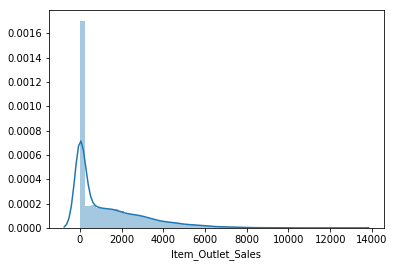

In [8]:
sns.distplot(data['Item_Outlet_Sales'])

In [9]:
print('Skewness: %f' % data['Item_Outlet_Sales'].skew())
print('Kurtsis: %f' %data['Item_Outlet_Sales'].kurt())

Skewness: 1.544684
Kurtsis: 2.419439


In [10]:
data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
source                        object
dtype: object

In [11]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train


In [12]:
categorial_features = data.select_dtypes(include=[np.object])
categorial_features.head(2)

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,source
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1,train
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2,train


In [13]:
numerical_features = data.select_dtypes(include=[np.number])
numerical_features

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,9.300,0.016047,249.8092,1999,3735.1380
1,5.920,0.019278,48.2692,2009,443.4228
2,17.500,0.016760,141.6180,1999,2097.2700
3,19.200,0.000000,182.0950,1998,732.3800
4,8.930,0.000000,53.8614,1987,994.7052
5,10.395,0.000000,51.4008,2009,556.6088
6,13.650,0.012741,57.6588,1987,343.5528
7,NaN,0.127470,107.7622,1985,4022.7636
8,16.200,0.016687,96.9726,2002,1076.5986
9,19.200,0.094450,187.8214,2007,4710.5350


In [14]:
data['Outlet_Establishment_Year'].value_counts()

1985    2439
1987    1553
1999    1550
1997    1550
2004    1550
2002    1548
2009    1546
2007    1543
1998     925
Name: Outlet_Establishment_Year, dtype: int64

In [15]:
data.apply(lambda x: sum(x.isnull()))

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
source                          0
dtype: int64

In [16]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
source                          0
dtype: int64

In [17]:
data.apply(lambda x : len(x.unique()))

Item_Identifier               1559
Item_Weight                    416
Item_Fat_Content                 5
Item_Visibility              13006
Item_Type                       16
Item_MRP                      8052
Outlet_Identifier               10
Outlet_Establishment_Year        9
Outlet_Size                      4
Outlet_Location_Type             3
Outlet_Type                      4
Item_Outlet_Sales             3494
source                           2
dtype: int64

16 types of items are there and 1559 items, calculating the frequency of the categories

In [18]:
for col in categorial_features:
    print('\n%s column: '%col)
    print(data[col].value_counts())


Item_Identifier column: 
FDR02    10
FDX48    10
FDJ41    10
FDZ33    10
FDL58    10
NCH30    10
FDZ48    10
FDX32    10
FDZ10    10
FDX21    10
FDA52    10
FDV28    10
FDR46    10
FDK33    10
FDT59    10
FDD14    10
FDT04    10
FDW03    10
FDM28    10
FDL40    10
NCX05    10
FDM56    10
FDF58    10
FDI04    10
FDH31    10
FDQ37    10
FDD02    10
FDN01    10
NCP55    10
FDA02    10
         ..
FDV55     8
FDA11     8
FDK32     8
NCU06     8
NCL29     8
FDG29     8
FDO52     8
FDU55     8
NCU42     8
FDT35     8
FDV44     8
FDI19     8
FDF38     8
FDI58     8
DRG25     8
NCA41     8
FDG05     8
FDS22     7
DRN11     7
FDM52     7
FDR51     7
FDM10     7
NCL42     7
FDM50     7
FDL50     7
FDO33     7
FDH58     7
FDI46     7
NCW54     7
FDX49     7
Name: Item_Identifier, Length: 1559, dtype: int64

Item_Fat_Content column: 
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

Item_Type column: 
Fruits and Vegetables    201

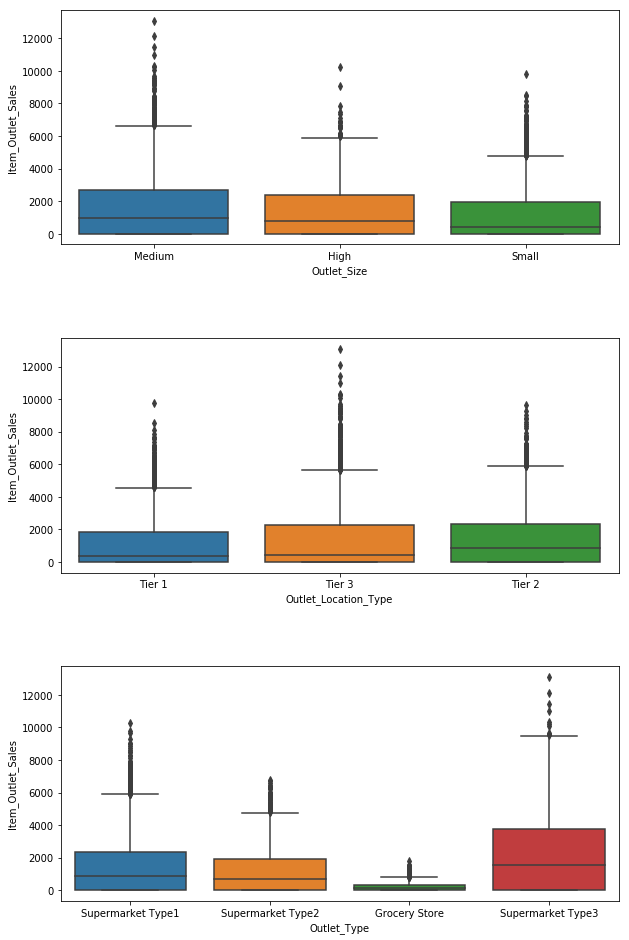

In [19]:
plt.figure(figsize = (10,9))
plt.subplot(311)
sns.boxplot(x='Outlet_Size', y= 'Item_Outlet_Sales', data=data)


plt.subplot(312)
sns.boxplot(x='Outlet_Location_Type', y= 'Item_Outlet_Sales', data=data)

plt.subplot(313)
sns.boxplot(x='Outlet_Type', y= 'Item_Outlet_Sales', data=data)

plt.subplots_adjust(wspace = 0.2, hspace = 0.4,top = 1.5)

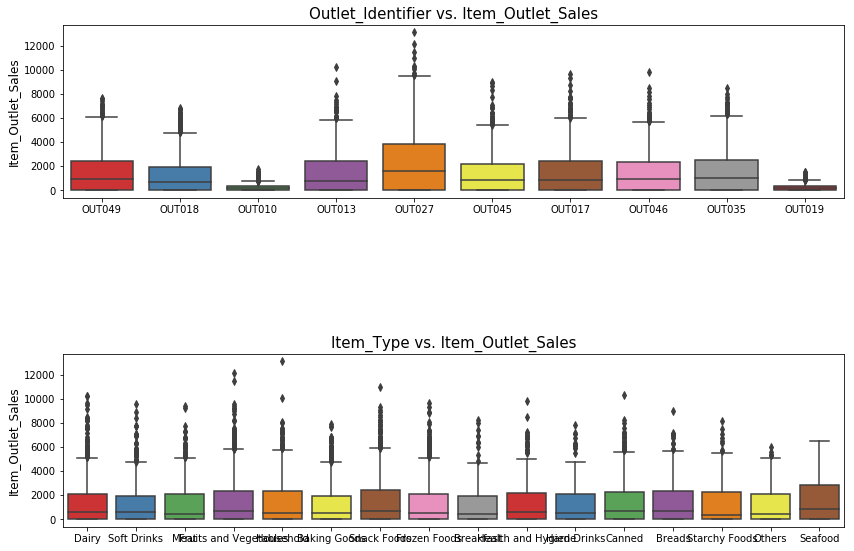

In [20]:
plt.figure(figsize = (14,9))

plt.subplot(211)
ax = sns.boxplot(x='Outlet_Identifier', y='Item_Outlet_Sales', data=data, palette="Set1")
ax.set_title("Outlet_Identifier vs. Item_Outlet_Sales", fontsize=15)
ax.set_xlabel("", fontsize=12)
ax.set_ylabel("Item_Outlet_Sales", fontsize=12)

plt.subplot(212)
ax = sns.boxplot(x='Item_Type', y='Item_Outlet_Sales', data=data, palette="Set1")
ax.set_title("Item_Type vs. Item_Outlet_Sales", fontsize=15)
ax.set_xlabel("", fontsize=12)
ax.set_ylabel("Item_Outlet_Sales", fontsize=12)

plt.subplots_adjust(hspace = 0.9, top = 0.9)


Imputing missing values Outlet size and item weight by mode and mean respectively

In [21]:
item_avg_weight = data.pivot_table(values='Item_Weight', index='Item_Identifier')
item_avg_weight
missing_values = data['Item_Weight'].isnull()
print('Missing Value:%d' %sum(missing_values))
data.loc[missing_values,'Item_Weight']  = data.loc[missing_values,'Item_Identifier'].apply(lambda x: item_avg_weight.at[x,'Item_Weight'])
data['Item_Weight'].isnull().sum()

Missing Value:2439


0

Now impute Output size by its mode

In [22]:
from scipy.stats import mode

#Determing the mode for each
outlet_size_mode = data.pivot_table(values='Outlet_Size', columns='Outlet_Type',aggfunc=(lambda x:mode(x.astype('str')).mode[0]))
print ('Mode for each Outlet_Type:')
print (outlet_size_mode)

#Get a boolean variable specifying missing Item_Weight values
missing_values = data['Outlet_Size'].isnull() 

#Impute data and check #missing values before and after imputation to confirm
print ('\nOrignal #missing: %d'% sum(missing_values))
data.loc[missing_values,'Outlet_Size'] = data.loc[missing_values,'Outlet_Type'].apply(lambda x: outlet_size_mode[x])
data['Outlet_Size'].isnull().sum()

Mode for each Outlet_Type:
Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2  \
Outlet_Size           nan             Small            Medium   

Outlet_Type Supermarket Type3  
Outlet_Size            Medium  

Orignal #missing: 4016


C:\Users\prabh\Anaconda3\lib\site-packages\scipy\stats\stats.py:245: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


0

Impute item visibility 0 by mean

In [23]:
#Determine average visibility of a product
visibility_avg = data.pivot_table(values='Item_Visibility', index='Item_Identifier')

#Impute 0 values with mean visibility of that product:
missing_values = (data['Item_Visibility'] == 0)

print ('Number of 0 values initially: %d'%sum(missing_values))
data.loc[missing_values,'Item_Visibility'] = data.loc[missing_values,'Item_Identifier'].apply(lambda x: visibility_avg.at[x, 'Item_Visibility'])
print ('Number of 0 values after modification: %d'%sum(data['Item_Visibility'] == 0))

Number of 0 values initially: 879
Number of 0 values after modification: 0


In [24]:
#Get the first two characters of ID:
data['Item_Type_Combined'] = data['Item_Identifier'].apply(lambda x: x[0:2])
#Rename them to more intuitive categories:
data['Item_Type_Combined'] = data['Item_Type_Combined'].map({'FD':'Food',
                                                             'NC':'Non-Consumable',
                                                             'DR':'Drinks'})
data['Item_Type_Combined'].value_counts()

Food              10201
Non-Consumable     2686
Drinks             1317
Name: Item_Type_Combined, dtype: int64

In [25]:
#Change categories of low fat:
print('Original Categories:')
print(data['Item_Fat_Content'].value_counts())

print('\nModified Categories:')
data['Item_Fat_Content'] = data['Item_Fat_Content'].replace({'LF':'Low Fat',
                                                             'reg':'Regular',
                                                             'low fat':'Low Fat'})
print(data['Item_Fat_Content'].value_counts())

Original Categories:
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

Modified Categories:
Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64


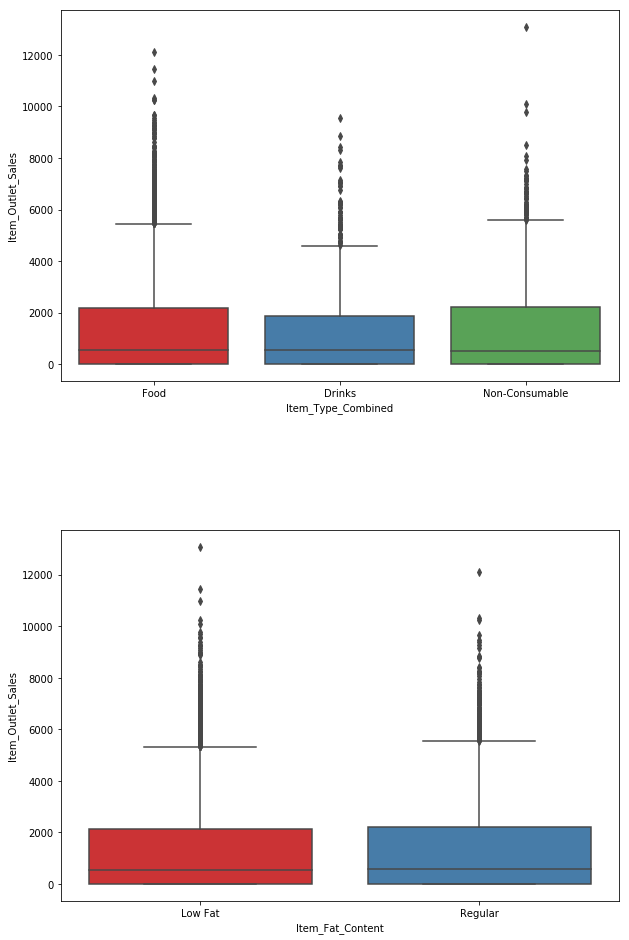

In [26]:
plt.figure(figsize = (10,9))

plt.subplot(211)
sns.boxplot(x='Item_Type_Combined', y='Item_Outlet_Sales', data=data, palette="Set1")

plt.subplot(212)
sns.boxplot(x='Item_Fat_Content', y='Item_Outlet_Sales', data=data, palette="Set1")

plt.subplots_adjust(wspace = 0.2, hspace = 0.4,top = 1.5)

plt.show()

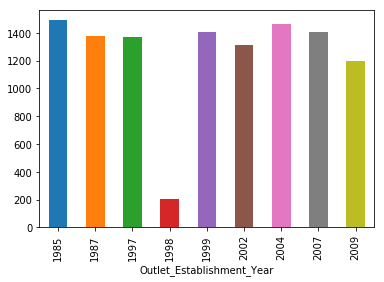

In [27]:
data.groupby('Outlet_Establishment_Year')['Item_Outlet_Sales'].mean().plot.bar()

In [28]:
data['Outlet_Years'] = 2009 - data['Outlet_Establishment_Year']
data['Outlet_Years'].describe()

count    14204.000000
mean        11.169319
std          8.371664
min          0.000000
25%          5.000000
50%         10.000000
75%         22.000000
max         24.000000
Name: Outlet_Years, dtype: float64

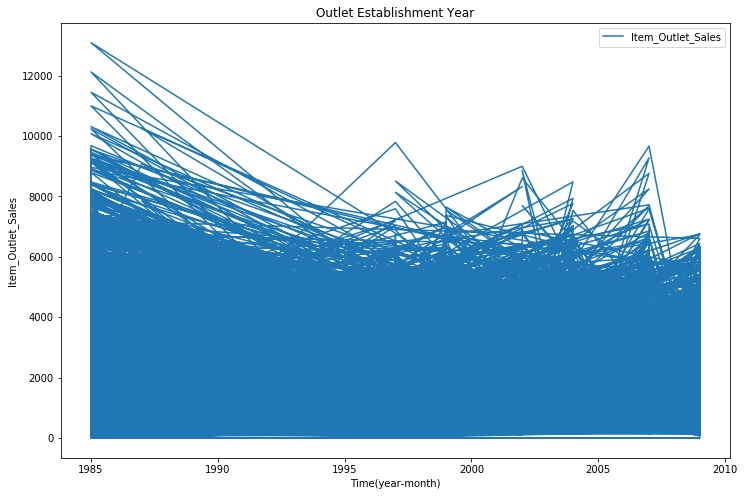

In [29]:
data.index = data['Outlet_Establishment_Year']
df = data.loc[:,['Item_Outlet_Sales']]
ts = df['Item_Outlet_Sales']
plt.figure(figsize=(12,8))
plt.plot(ts, label='Item_Outlet_Sales')
plt.title('Outlet Establishment Year')
plt.xlabel('Time(year-month)')
plt.ylabel('Item_Outlet_Sales')
plt.legend(loc = 'best')
plt.show()

Implementing One Hot encoding of Categorical Variables

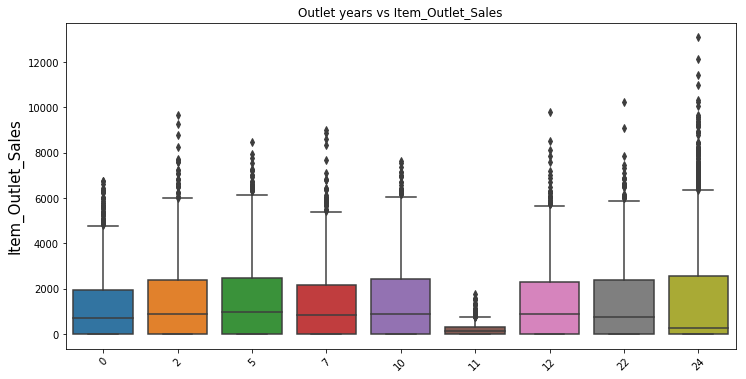

In [30]:
plt.figure(figsize = (12,6))
ax = sns.boxplot(x = 'Outlet_Years', y = 'Item_Outlet_Sales', data = data)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
ax.set_title('Outlet years vs Item_Outlet_Sales')
ax.set_xlabel('', fontsize = 15)
ax.set_ylabel('Item_Outlet_Sales', fontsize = 15)

plt.show()

In [31]:
temp_data = data.loc[data['Outlet_Establishment_Year'] == 1998]

In [32]:
test_temp_data = test.loc[test['Outlet_Establishment_Year'] == 1998]
test_temp_data['Outlet_Type'].value_counts()

Grocery Store    370
Name: Outlet_Type, dtype: int64

In [33]:
#Import library:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
#New variable for outlet
data['Outlet'] = le.fit_transform(data['Outlet_Identifier'])
var_mod = ['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Item_Type_Combined','Outlet_Type','Outlet']
le = LabelEncoder()
for i in var_mod:
    data[i] = le.fit_transform(data[i])

In [34]:
#One Hot Coding:
data = pd.get_dummies(data, columns=['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type',
                              'Item_Type_Combined','Outlet'])

In [35]:
data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Item_Outlet_Sales            float64
source                        object
Outlet_Years                   int64
Item_Fat_Content_0             uint8
Item_Fat_Content_1             uint8
Outlet_Location_Type_0         uint8
Outlet_Location_Type_1         uint8
Outlet_Location_Type_2         uint8
Outlet_Size_0                  uint8
Outlet_Size_1                  uint8
Outlet_Size_2                  uint8
Outlet_Size_3                  uint8
Outlet_Type_0                  uint8
Outlet_Type_1                  uint8
Outlet_Type_2                  uint8
Outlet_Type_3                  uint8
Item_Type_Combined_0           uint8
Item_Type_Combined_1           uint8
Item_Type_Combined_2           uint8
Outlet_0                       uint8
O

In [36]:
#Drop the columns which have been converted to different types:
data.drop(['Item_Type','Outlet_Establishment_Year'],axis=1,inplace=True)

#Divide into test and train:
train = data.loc[data['source']=="train"]
test = data.loc[data['source']=="test"]

#Drop unnecessary columns:
test.drop(['Item_Outlet_Sales','source'],axis=1,inplace=True)
train.drop(['source'],axis=1,inplace=True)

#Export files as modified versions:
train.to_csv("train_modified.csv",index=False)
test.to_csv("test_modified.csv",index=False)

C:\Users\prabh\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [37]:

test.dtypes

Item_Identifier            object
Item_Weight               float64
Item_Visibility           float64
Item_MRP                  float64
Outlet_Identifier          object
Outlet_Years                int64
Item_Fat_Content_0          uint8
Item_Fat_Content_1          uint8
Outlet_Location_Type_0      uint8
Outlet_Location_Type_1      uint8
Outlet_Location_Type_2      uint8
Outlet_Size_0               uint8
Outlet_Size_1               uint8
Outlet_Size_2               uint8
Outlet_Size_3               uint8
Outlet_Type_0               uint8
Outlet_Type_1               uint8
Outlet_Type_2               uint8
Outlet_Type_3               uint8
Item_Type_Combined_0        uint8
Item_Type_Combined_1        uint8
Item_Type_Combined_2        uint8
Outlet_0                    uint8
Outlet_1                    uint8
Outlet_2                    uint8
Outlet_3                    uint8
Outlet_4                    uint8
Outlet_5                    uint8
Outlet_6                    uint8
Outlet_7      

In [38]:
target = 'Item_Outlet_Sales'
IDcolumns = ['Item_Identifier','Outlet_Identifier']

In [39]:
predictors = [x for x in train.columns if x not in [target]+IDcolumns]

In [40]:
from sklearn.linear_model import LinearRegression
le = LinearRegression()
le.fit(train[predictors],train[target])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [41]:
pred = le.predict(test[predictors])

In [42]:
pred

array([1847.88833294, 1569.34039507, 1875.61463945, ..., 1809.35593931,
       3539.0001027 , 1266.59119677])